In [1]:
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap
import Les5_RandomForest as RF
import matplotlib.pyplot as plt
import random

In [2]:
# сгенерируем данные, представляющие собой 500 объектов с 5-ю признаками
classification_data, classification_labels = datasets.make_classification(n_samples=500,
                                                      n_features = 5, n_informative = 5,
                                                      n_classes = 2, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=11)
random.seed(42)

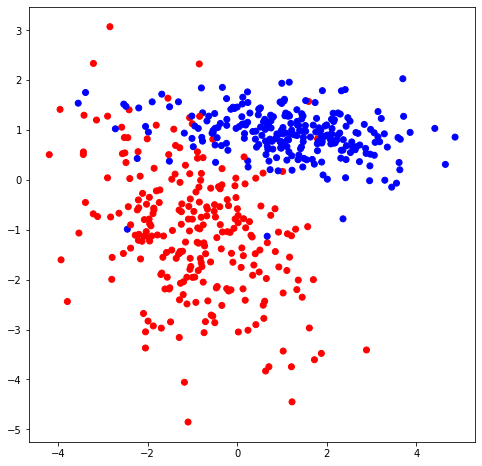

In [3]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)),
              c=classification_labels, cmap=colors)

In [4]:
def pca_(X, y):
    # Для начала отмасштабируем выборку
    X_ = X.astype(float)

    rows, cols = X_.shape

    # центрирование - вычитание из каждого значения среднего по строке
    means = X_.mean(0)
    for i in range(rows):
        for j in range(cols):
            X_[i, j] -= means[j]

    # деление каждого значения на стандартное отклонение
    std = np.std(X_, axis=0)
    for i in range(cols):
        for j in range(rows):
            X_[j][i] /= std[i]

    # Найдем собственные векторы и собственные значения

    covariance_matrix = X_.T.dot(X_)

    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

    # сформируем список кортежей (собственное значение, собственный вектор)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

    # и отсортируем список по убыванию собственных значений
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
    W = np.hstack((eig_pairs[0][1].reshape(X_.shape[1], 1), eig_pairs[1][1].reshape(X_.shape[1], 1)))

    print(f'Матрица весов W:\n', W)

    X_pca = X_.dot(W)

    plt.figure()
    for c, i in zip("rgb", [0, 1, 2]):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c)
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.title('PCA датасета')
    plt.show()

    # Сформируем новую матрицу "объекты-признаки"
    return X_pca

Теперь построим несколько случайных лесов с PCA и без

In [5]:
n_trees = 5
my_forest_5 = RF.random_forest(classification_data, classification_labels, n_trees)

answers, OOB_score = RF.tree_vote(my_forest_5, classification_data, classification_labels)
print(f'Out-of-bags score случайного леса из {n_trees} деревьев: {OOB_score:.3f}')

Out-of-bags score случайного леса из 5 деревьев: 0.922


Матрица весов W:
 [[ 0.41586135  0.17112534]
 [ 0.65652156 -0.06087134]
 [-0.09409052 -0.62956006]
 [-0.609417    0.29207925]
 [-0.12568484 -0.69667399]]


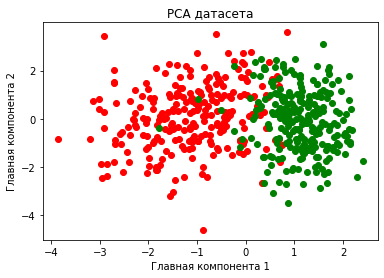

In [6]:
classification_data_pca = pca_(classification_data, classification_labels)

In [7]:
n_trees = 5
my_forest_5 = RF.random_forest(classification_data_pca, classification_labels, n_trees)

answers, OOB_score = RF.tree_vote(my_forest_5, classification_data_pca, classification_labels)
print(f'Out-of-bags score случайного леса из {n_trees} деревьев: {OOB_score:.3f}')



Out-of-bags score случайного леса из 5 деревьев: 0.894
